# Ejercicio 1

Se realizan 20 mediciones con un multímetro digital, repetidas en las mismas
condiciones ambientales, obteniéndose una media aritmética de:


y una desviación estándar experimental:

\begin{equation}
S = 1{,}489 \ \text{V}
\end{equation}


El multímetro posee las siguientes especificaciones:

- Rango: 200 V  
- Dígitos: 3 y ½  
- Error máximo:  

\begin{equation}
\pm (0,5\% \ \text{lectura} + 3 \ \text{dígitos})
\end{equation}

Como el instrumento es de 3½ dígitos en el rango de 200 V, la menor unidad
que muestra en pantalla es:

\begin{equation}
\text{LSD} = 0,1 \ \text{V}
\end{equation}


Por lo tanto, si se indica que:

\begin{equation}
\text{err}_{\text{máx}} = \pm(0,5\% \ \text{lectura} + 3 \ \text{dígitos})
\end{equation}


entonces para este rango:

\begin{equation}
\text{err}_{\text{máx}} = \pm(0,5\% \ \text{lectura} + 0,3 \ \text{V})
\end{equation}

---

In [22]:
import numpy as np
from scipy import stats

------
##### DATOS

In [34]:
N = 20      # Número de muestras
M = 100.145 # [V] Media aritmética
S = 1.489   # [V] Desvío Estándar Experimental
rango = 200             # [V]
err_max = [0.005, 0.3]  # [V]

---
##### INCERTIDUMBRE TIPO A

\begin{equation}
    \mu_a = \frac{S}{\sqrt{N}}
\end{equation}

In [35]:
ua = round(S / np.sqrt(N), 3)  # Estimamos el desvío verdadero a partir de N muestras
print(ua)

0.333


---
##### INCERTIDUMBRE TIPO B

\begin{equation}
    \mu_b = \frac{E}{\sqrt{k}}
\end{equation}

Donde E:

\begin{equation}
    E = M \times 0.5\% + 0.3V
\end{equation}

Las especificaciones son un límite uniforme, por lo que se modela con distr.
Rectangular, por ende el k = 3.

In [38]:
err_lectura = err_max[0]
err_rango = err_max[1]
E = M * err_lectura + err_rango
k = 3
ub = E / np.sqrt(k)

---
##### INCERTIDUMBRE COMBINADA

\begin{equation}
    \mu_c = \sqrt{\mu_a^2 + \mu_b^2}
\end{equation}

In [39]:
uc = np.sqrt(ua**2 + ub**2)

---
##### GRADOS DE LIBERTAD EFECTIVOS

\begin{equation}
    v_{eff} = \frac{\mu_c^4}{\frac{\mu_a^4}{N-1}}
\end{equation}

Con los grados de libertad puedo buscar en la tabla de T-de-Student bilateral el factor k
para corregir la incertidumbre combinada para un 95% de confianza.

Al ser un estudio bilateral el Intervalo de Confianza del 95% para una T-de-Student se representa de la siguiente manera:

\begin{equation}
    IC = (-t_{0,975;v_{eff}} ; t_{0,975;v_{eff}})
\end{equation}

Por ende, mi k ajustado va a ser:

\begin{equation}
    k = t_{0,975;v_{eff}}
\end{equation}

que, ejecutando el siguiente script, me da:

In [40]:
# Grados de libertad
def veff(uc: float, ua: float, n: int) -> int:
    veff = ((uc**4) / ((ua**4) / (n - 1)))
    return int(veff)

v_eff = veff(uc=uc, ua=ua, n=N)

# Nivel de significancia para una cola (α/2)
conf = 0.95
alpha = (1 - conf) / 2

# Valor crítico t
t_critical = stats.t.ppf(1 - alpha, v_eff)

---
##### INCERTIDUMBRE EXPANDIDA

\begin{equation}
    \mu_{exp} = t_{critical} \cdot \mu_c
\end{equation}

In [41]:
u_exp = t_critical * uc

---
##### RESULTADOS

In [46]:
print(f"""
{'u_a':<6}: {round(ua,3):>6} V
{'u_b':<6}: {round(ub,3):>6} V
{'u_c':<6}: {round(uc,3):>6} V
{'v_eff':<6}: {v_eff:>6}
{'t_crit':<6}: {round(t_critical,3):>6}
{'u_exp':<6}: {round(u_exp,3):>6} V
------------------------
V = ({M} ± {round(u_exp,3)}) V
""")


u_a   :  0.333 V
u_b   :  0.462 V
u_c   :   0.57 V
v_eff :    162
t_crit:  1.975
u_exp :  1.125 V
------------------------
V = (100.145 ± 1.125) V



---
---
# Ejercicio 2

Considere cinco conjuntos independientes de observaciones simultáneas de las tres
magnitudes de entrada V, I, y φ se obtienen en condiciones similares.

![Texto alternativo](Captura.png)

a) Cuáles son las circunstancias en las que debe observarse la correlación entre las
magnitudes de entrada. ¿Un coeficiente de correlación igual a 0 (cero) indica que la
correlación es alta o baja?

    Se observa la correlación cuando interesa medir el grado de dependencia lineal entre dos magnitudes. Cuando el coeficiento de correlación es 0 indica que no hay dependencia lineal entre las magnitudes, o sea, no estan relacionadas linealmente las variables, aunque podrían estarlo no linealmente.

b) Calcule la incertidumbre combinada de las cantidades R, X y Z.

In [12]:
import numpy as np

---
##### Variables

In [13]:
N = 5

v_mean = 4.9990         # V
i_mean = 19.6610/1000   # A
ϕ_mean = 1.04446        # rad

v_std = 0.0032          # V
i_std = 0.0095/1000     # A
ϕ_std = 0.00075         # rad

cc_v_i = -0.36
cc_v_ϕ = 0.86
cc_i_ϕ = -0.65

---
##### Incertidumbre Tipo A

\begin{equation}
    \mu_i = \frac{\sigma}{\sqrt{N}}
\end{equation}

In [14]:
v_u_i = v_std/np.sqrt(N)
i_u_i = i_std/np.sqrt(N)
ϕ_u_i = ϕ_std/np.sqrt(N)

---
#### Incertidumbre Combinada

1) Modelo

\begin{equation}
    Z = \frac{V}{I}, \space R = Z \cos{\phi}, \space X = Z \sin{\phi}
\end{equation}

2) Regla General (GUM)

Para:

\begin{equation}
    y = f(V, I, \phi)
\end{equation}

entonces:

\begin{equation}
    u^2(y) = \sum_i \left( \frac{\partial f}{\partial x_i} \right)^{2} u^{2}(x_i)
    \;+\; 2 \sum_{i<j} \frac{\partial f}{\partial x_i}\frac{\partial f}{\partial x_j}\,
    u(x_i)u(x_j)\,r(x_i,x_j)
\end{equation}

3) Derivadas parciales necesarias

- Para Z:

\begin{equation}
    \frac{\partial Z}{\partial V} = \frac{1}{I}, \space \frac{\partial Z}{\partial I} = - \frac{V}{I^2}, \space \frac{\partial Z}{\partial \phi} = 0
\end{equation}

- Para R:

\begin{equation}
    \frac{\partial R}{\partial V} = \frac{\cos{\phi}}{I}, \space \frac{\partial R}{\partial I} = - \frac{Z \cos{\phi}}{I}, \space \frac{\partial Z}{\partial \phi} = - Z \sin{\phi}
\end{equation}

- Para X:

\begin{equation}
    \frac{\partial X}{\partial V} = \frac{\sin{\phi}}{I}, \space \frac{\partial Z}{\partial I} = - \frac{Z \sin{\phi}}{I}, \space \frac{\partial Z}{\partial \phi} = Z \cos
\end{equation}

In [15]:
z = v_mean / i_mean
r = z * np.cos(ϕ_mean)
x = z * np.sin(ϕ_mean)

def u_c(dfdx:float = 0.0, dfdy:float = 0.0, dfdz: float = 0.0, 
        ux: float = 0.0, uy: float = 0.0, uz: float = 0.0, 
        rxy: float = 0.0, rxz: float = 0.0, ryz: float = 0.0
    ) -> float:

    return np.sqrt(
                    ((dfdx * ux) ** 2 + (dfdy * uy) ** 2 + (dfdz * uz) ** 2)
                    + 2 * (
                        (dfdx * dfdy * ux * uy * rxy) 
                        + (dfdx * dfdz * ux * uz * rxz) 
                        + (dfdy * dfdz * uy * uz * ryz)
                    )
                )

# Para Z
dzdv = 1 / i_mean
dzdi = -v_mean / (i_mean ** 2)
dzdϕ = 0

z_u_c = u_c(dzdv, dzdi, dzdϕ, v_u_i, i_u_i, ϕ_u_i, cc_v_i, cc_v_ϕ, cc_i_ϕ)

# Para R
drdv = np.cos(ϕ_mean) / i_mean
drdi = - (z * np.cos(ϕ_mean)) / i_mean
drdϕ = - (z * np.sin(ϕ_mean))

r_u_c = u_c(drdv, drdi, drdϕ, v_u_i, i_u_i, ϕ_u_i, cc_v_i, cc_v_ϕ, cc_i_ϕ)

# Para X
dxdv = np.sin(ϕ_mean) / i_mean
dxdi = - (z * np.sin(ϕ_mean)) / i_mean
dxdϕ = (z * np.cos(ϕ_mean))

x_u_c = u_c(dxdv, dxdi, dxdϕ, v_u_i, i_u_i, ϕ_u_i, cc_v_i, cc_v_ϕ, cc_i_ϕ)

print(f"""
Z = {round(z,4)} ± {round(z_u_c,4)} Ω (rel. {round((z_u_c/z)*100,3)}%)
R = {round(r,4)} ± {round(r_u_c,4)} Ω (rel. {round((r_u_c/r)*100,3)}%)
X = {round(x,4)} ± {round(x_u_c,4)} Ω (rel. {round((x_u_c/x)*100,3)}%)
""")


Z = 254.2597 ± 0.1058 Ω (rel. 0.042%)
R = 127.7322 ± 0.0313 Ω (rel. 0.025%)
X = 219.8465 ± 0.1322 Ω (rel. 0.06%)



---
---
# Ejercicio 3

Se busca calibrar la función amperímetro de alterna de un multímetro digital de 3 ½ dígitos.
Se controlará en este ejercicio sólo el punto de fondo de escala de 10A, con 50 Hz. Se
empleará un calibrador (aparato que provee la corriente necesaria y la indicación de su valor,
10A en este caso, con alta exactitud).

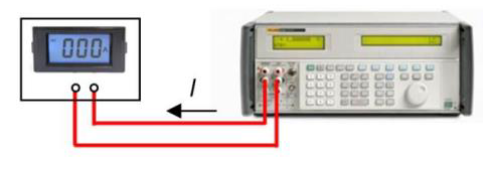

Se toman 5 mediciones sucesivas en el instrumento a contrastar que arrojan los siguientes
valores:

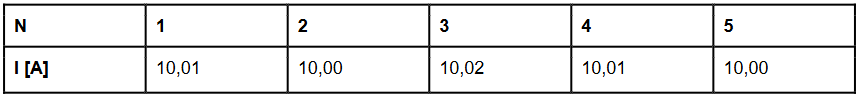

El fabricante del calibrador específica en su catálogo que la incertidumbre expandida de este
dispositivo es ±(0,05% lectura + 2 mA) con una probabilidad de 99% y distribución gaussiana.
Estime el error y la incertidumbre expandida en el error de la medida de 10 A, con un factor de
cobertura del 95 %.

In [48]:
i = [10.01,10.00,10.02,10.01,10.00]
i_mean = np.mean(i)
i_std = np.std(i, ddof=1)

# INCERTIDUMBRE CORRIENTE (TIPO A)
ua = i_std / np.sqrt(len(i))

# INCERTIDUMBRE CALIBRADOR (TIPO B)
i_cal = 10  # A
k_cal = 2.576 # Por prob. del 99% con dist. Gaussiana 
err_lectura = 0.005
err_rango = 0.000002   # A
ub = (i_cal*err_lectura + err_rango)/np.sqrt(k_cal) # +-(0.05% + 2mA)

# INCERTIDUMBRE COMBINADA
uc = np.sqrt(ua**2 + ub**2)

# ESTIMACIÓN DE ERROR (Expansión de incertidumbre)
# Para probabilidad de cobertura del 95% usamos k = 2:
v_eff = veff(uc=uc, ua=ua, n=len(i))

# Nivel de significancia para una cola (α/2)
conf = 0.95
alpha = (1 - conf) / 2

# Valor crítico t
t_critical = stats.t.ppf(1 - alpha, v_eff)

u_exp = uc * t_critical

print(f"""
{'u_a':<6}: {round(ua,3):>6} V
{'u_b':<6}: {round(ub,3):>6} V
{'u_c':<6}: {round(uc,3):>6} V
{'v_eff':<6}: {v_eff:>6}
{'t_crit':<6}: {round(t_critical,3):>6}
{'u_exp':<6}: {round(u_exp,3):>6} V
------------------------
V = ({i_mean} ± {round(u_exp,3)}) V
""")


u_a   :  0.004 V
u_b   :  0.031 V
u_c   :  0.031 V
v_eff :  19783
t_crit:   1.96
u_exp :  0.062 V
------------------------
V = (10.008 ± 0.062) V



---
---
# Ejercicio 4

En una resistencia alimentada con una fuente de corriente de 10A, ±0,1% según expresaba
su certificado de calibración con distribución normal y un intervalo de confianza del 95%, se
obtuvo una medición de 123,38V y un desvío estándar experimental de 50mV con un voltímetro
digital de de 4 ¾ dígitos y un error de ±(0,04%+1d) rangos de 400mV, 4V, 40V, 400V.

Utilizando dicha resistencia como medidor indirecto de corriente, se midió sobre ella una
tensión, con el voltímetro anterior, obteniéndose una indicación de 346,42mV y un desvío
estándar experimental de 0,50mV. Determinar:

a) Característica de la resistencia.

La resistencia R se obtiene de la medición, aplicando la ley de Ohm:

\begin{equation}
    R = \frac{V}{I}
\end{equation}

- Fuente de corriente: 
    
Como me dice que su calibración es una distribución normal con un IC del 95% entonces k = 2.

\begin{equation}
    I = 10A ± 0.1\% \space (k = 2, dist. normal)
\end{equation}

Su incertidumbre est u_exp es:

\begin{equation}
    \mu_{exp} = \frac{\frac{0.1\%}{100} \cdot 10}{k} = \frac{0.01}{2} = 0.005 A
\end{equation}

In [82]:
i = 10
k = 2
i_u_exp = (((0.1/100)*i)/k)

- Tensión medida:

\begin{equation}
    V = 123.38 V
\end{equation}

con un desvío estandar de:

\begin{equation}
    \sigma = 0.050V
\end{equation}

con un instrumento de exactitud:

\begin{equation}
    ±(0.04\%+1d) en el rango de 400V
\end{equation}

como es un instrumento de 4 ¾ dígitos, entonces el error del instrumento es:

\begin{equation}
    ±(0.04\% + 0.01V) en el rango de 400V
\end{equation}

por ende, si se midieron 123.38V, entonces:

In [83]:
v = 123.38
err_v = v * 0.0004 + 0.01 # V

##### INCERTIDUMBRE TIPO B DEL VOLTIMETRO

\begin{equation}
    \mu_j = \frac{err_V}{\sqrt{k}}
\end{equation}

Donde E:

\begin{equation}
    err_{V} = V \times 0.04\% + 0.01V
\end{equation}

Las especificaciones son un límite uniforme, por lo que se modela con distr.
Rectangular, por ende el k = 3.

In [84]:
k = 3
v_u_j = err_v / np.sqrt(k) 
print(f'v_u_j = {v_u_j:0.3f} V')

v_u_j = 0.034 V


##### INCERTIDUMBRE TIPO A DEL VOLTIMETRO

Como solo tenemos una muestra en el experimento entonces N = 1:

\begin{equation}
    \mu_i = \frac{\sigma}{\sqrt{N}} = \frac{0.050}{\sqrt{1}} = 0.050 = \sigma
\end{equation}

In [85]:
v_std = 0.05
v_u_i = v_std

##### INCERTIDUMBRE COMBINADA DEL VOLTIMETRO

\begin{equation}
    \mu_c = \sqrt{\mu_i^2 + \mu_j^2}
\end{equation}

In [86]:
v_u_c = np.sqrt(v_u_i**2 + v_u_j**2)

- Resistencia

\begin{equation}
    R = \frac{V}{I}
\end{equation}

derivadas:

\begin{equation}
    \frac{\partial R}{\partial V} = \frac{1}{I}\space , \space \frac{\partial R}{\partial I} = - \frac{V}{I^2}
\end{equation}

incertidumbre de R:

\begin{equation}
    \mu(R)^2 = (\frac{\partial R}{\partial V} \mu(V))^2 + (\frac{\partial R}{\partial I} \mu(I))^2
\end{equation}

In [87]:
r = v / i
drdv = 1 / i
drdi = - v / (i**2)

r_u_c = u_c(dfdx=drdv, dfdy=drdi, ux=v_u_c, uy=i_u_exp)

print(f'R = ({r:0.3f} ± {r_u_c:0.3f})Ω')

R = (12.338 ± 0.009)Ω


b) El resultado de ambas mediciones.

- Primera medición

In [88]:
v1 = v
i1 = i
v_u_c_1 = v_u_c
i_u_c_1 = i_u_exp
print(f"""
V1 = ({v1:0.3f} ± {v_u_c:0.3f}) V
I1 = ({i1:0.3f} ± {i_u_exp:0.3f}) A
""")


V1 = (123.380 ± 0.061) V
I1 = (10.000 ± 0.005) A



- Segunda medición

Con el mismo voltimetro se midió V = 346.42 mV con un desvío experimental de 0.50 mV. De esa medición se deduce que se uso el rango de 400 mV, por ende su exactitud esta dada por:

\begin{equation}
    ±(0.04% + 0.01 V)
\end{equation}

por ende, si se midieron 346.42 mV, entonces:

In [89]:
v2 = 346.42
err_v2 = v2 * 0.0004 + 0.01 # mV

##### INCERTIDUMBRE TIPO B DEL VOLTIMETRO

\begin{equation}
    \mu_j = \frac{err_V}{\sqrt{k}}
\end{equation}

Donde E:

\begin{equation}
    err_{V} = V \times 0.04\% + 0.01V
\end{equation}

Las especificaciones son un límite uniforme, por lo que se modela con distr.
Rectangular, por ende el k = 3.

In [90]:
k = 3
v_u_j_2 = err_v2 / np.sqrt(k) 
print(f'v_u_j = {v_u_j_2:0.3f} mV')

v_u_j = 0.086 mV


##### INCERTIDUMBRE TIPO A DEL VOLTIMETRO

Como solo tenemos una muestra en el experimento entonces N = 1:

\begin{equation}
    \mu_i = \frac{\sigma}{\sqrt{N}} = \frac{0.050 mV}{\sqrt{1}} = 0.050 mV= \sigma
\end{equation}

In [91]:
v_std_2 = 0.050 # mV
v_u_i_2 = v_std_2

##### INCERTIDUMBRE COMBINADA DEL VOLTIMETRO

\begin{equation}
    \mu_c = \sqrt{\mu_i^2 + \mu_j^2}
\end{equation}

In [92]:
v_u_c_2 = np.sqrt(v_u_i_2**2 + v_u_j_2**2) # mV

Corriente indirecta:

\begin{equation}
    I = \frac{V}{R} = \frac{346.42 mV}{12.338 Ω}
\end{equation}

Incertidumbre I:

\begin{equation}
    \mu(I)^2 = (\frac{\partial I}{\partial V} \mu(V))^2 + (\frac{\partial I}{\partial R} \mu(R))^2
\end{equation}

Derivadas:

\begin{equation}
    \frac{\partial I}{\partial V} = \frac{1}{R}\space , \space \frac{\partial I}{\partial R} = - \frac{V}{R^2}
\end{equation}


In [93]:
i2 = v2 / r
didv = 1 / r
didr = - v2 / (r**2)

i_u_c_2 = u_c(dfdx=didv, dfdy=didr, ux=v_u_c, uy=r_u_c)

print(f"""
V2 = ({v2:0.3f} ± {v_u_c_2:0.3f}) mV
I2 = ({i2:0.3f} ± {i_u_c_2:0.3f}) mA
""")


V2 = (346.420 ± 0.099) mV
I2 = (28.077 ± 0.020) mA



c) Indique la potencia disipada en ambas mediciones

\begin{equation}
    P = I^2R = VI
\end{equation}

In [103]:
# POTENCIA CASO 1
p1 = v * i
dp1dv = i
dp1di = v

p1_u_c = u_c(dfdx=dp1dv, dfdy=dp1di, ux=v_u_c_1, uy=i_u_c_1)

# POTENCIA CASO 2
p2 = (v2/1000) * (i2/1000)
dp2dv = i2/1000
dp2di = v2/1000

p2_u_c = u_c(dfdx=dp2dv, dfdy=dp2di, ux=v_u_c_2/1000, uy=i_u_c_2/1000)

print(f"""
P2 = ({p1:0.3f} ± {p1_u_c:0.3f}) W
P2 = ({p2*1000:0.3f} ± {p2_u_c*1000:0.3f}) mW
""")


P2 = (1233.800 ± 0.865) W
P2 = (9.727 ± 0.008) mW

